<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

**Цели:**
- Научиться определять рыночную стоимость объектов недвижимости.
- Автоматизировать систему для определения аномалий и мошенников.

**Задачи:**
- Изучить и установить основные параметры.
- Изучить время продажи.
- Избавиться от нетипичных данных.
- Изучить факторы, больше всего влияющие на стоимость.
- Проанализировать 10 населённых пунктов, с наибольшим количеством объявлений.
- Определить область, которая является центральной частью города, выделить в сегмент и проанализировать. 

**Данные:**
- Данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет
- Вписанные по квартире пользователем.
- Полученные автоматически с помощью картографии.

*Описание данных:*
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

## Изучение данных из файла

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Предварительно можем сказать, что:
- `first_day_exposition` - неверный тип данных, так как это дата публикации переведём в datetime.
- `ceiling_height` - много пропущенных значений.
- `floors_total` - неверный тип данных. Это количество этажей, приведём столбец к типу int. Есть пропуски.
- `living_area` - есть пропуски.
- `is_apartment` - столбец подразумевает логический тип данных, поменяем его на bool.
- `kitchen_area` - есть пропуски.
- `balcony` - есть пропуски.
- `locality_name` - есть пропуски.
- `airports_nearest` - есть пропуски.
- `cityCenters_nearest` - есть пропуски.
- `parks_around3000` - есть пропуски. Некорректный тип данных, количество парков - целое число. 
- `parks_nearest` - есть пропуски.
- `ponds_around3000` - есть пропуски. Некорректный тип данных, количество водоёмов - целое число. 
- `ponds_nearest` - есть пропуски.
- `days_exposition` - есть пропуски. Некорректный тип данных, срок публикации - целое число. 

## Предобработка данных

Изучим основные столбцы на предмет нестандартных значений. 

In [3]:
[data[x].value_counts() for x in data]

[10    1798
 9     1725
 20    1694
 8     1585
 7     1521
 6     1482
 11    1362
 5     1301
 12    1225
 0     1059
 13    1015
 14     986
 4      986
 15     948
 1      872
 3      769
 16     761
 17     650
 18     642
 2      640
 19     603
 23      16
 21      12
 24       8
 22       8
 26       5
 28       4
 32       4
 50       3
 29       3
 31       2
 35       2
 30       2
 27       2
 37       1
 39       1
 25       1
 42       1
 Name: total_images, dtype: int64,
 4500000.0     342
 3500000.0     291
 4000000.0     260
 4300000.0     260
 4200000.0     259
              ... 
 4412094.0       1
 6416000.0       1
 4581000.0       1
 34551000.0      1
 6029433.0       1
 Name: last_price, Length: 2978, dtype: int64,
 45.00     419
 42.00     383
 60.00     347
 31.00     346
 44.00     345
          ... 
 45.85       1
 44.18       1
 59.83       1
 127.20      1
 23.55       1
 Name: total_area, Length: 2182, dtype: int64,
 2018-02-01T00:00:00    368
 2017-11-10T0

In [4]:
def print_nan_ratio(column):
    return print('Пропущено {:.1%}'. format(data[column].isna().mean(), 2) + ' значений')

for column in data.columns:
    print_nan_ratio(column)

Пропущено 0.0% значений
Пропущено 0.0% значений
Пропущено 0.0% значений
Пропущено 0.0% значений
Пропущено 0.0% значений
Пропущено 38.8% значений
Пропущено 0.4% значений
Пропущено 8.0% значений
Пропущено 0.0% значений
Пропущено 88.3% значений
Пропущено 0.0% значений
Пропущено 0.0% значений
Пропущено 9.6% значений
Пропущено 48.6% значений
Пропущено 0.2% значений
Пропущено 23.4% значений
Пропущено 23.3% значений
Пропущено 23.3% значений
Пропущено 65.9% значений
Пропущено 23.3% значений
Пропущено 61.6% значений
Пропущено 13.4% значений


In [5]:
data.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

Изменим все некорректно указанные типы данных.
1. `first_day_exposition` - время не указано. Трансформируем в формат ГГ-ММ-ДД.
2. `ceiling_height` - с помощью метода `value_counts()` определили, что есть отклонения, но на гистограмме они не заметны. Пропусков очень много, средняя и медиана почти не отличаются, можно заполнить любой из них.
3. `days_exposition` - здесь вероятнее всего пропущены значения в объявлениях, которые были сняты в день публикации. Заполним пропуски нулями и приведём к int.
4. `locality_name` - нет идей относительно причин пропусков, их немного, удалим. Сообщим ответственным, это поле по хорошему должно быть обязательным для ввода.
5. `balcony` - пропуски балконов вероятно говорят об их отсутствии. Заполним нулями и приведём к int.
6. `is_apartment` - пропуси в столбце с апартаментами заменим на False.
7. `last_price` - чтобы было удобнее считать, приведём цену к значению int.
8. `living_area` - как заполнить пропуски не совсем ясно. Можно попробовать оттолкнуться от отношения стоимости квартиры к среднему значению стоимости квадратного метра для района.
9. `airports_nearest` - где возможно, заменим значение до ближайшего аэропорта до среднего по району.
10. `cityCenters_nearest` - где возможно, заменим значение до центра до среднего по району.
11. `kitchen_area` - среднее и медиана близки, заменим медианой.

In [6]:
#1
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

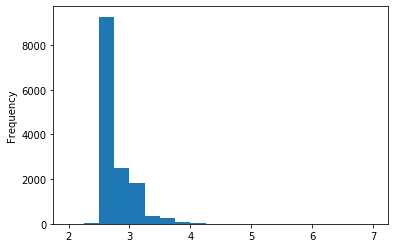

In [7]:
#2
data['ceiling_height'].sort_values().plot(y='ceiling_height', kind='hist', bins=20, range=(2,7))

In [8]:
#2
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [9]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [10]:
data['ceiling_height'].isna().sum()

0

In [11]:
#3
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

In [12]:
#4
data = data.dropna(subset=['locality_name'])
data['locality_name'].isna().sum()

0

In [13]:
#5
data['balcony'] = data['balcony'].fillna(0).astype('int')

In [14]:
#6
data['is_apartment'] = data['is_apartment'].fillna(False)

In [15]:
#7
data['last_price'] = (data['last_price']/1000000).astype('int')

```python

columns = [col1, col2, col3]

for i in columns:
    df[i] = df[i].fillna(0)

```

In [16]:
#8
data['living_area'].describe()

count    21752.000000
mean        34.448356
std         22.037664
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [17]:
data['price_for_square_meter'] = (data['last_price'] / data['total_area']).astype('int')
local_price_m2 = data.groupby('locality_name')['price_for_square_meter'].transform('mean') # группируем по району
data['price_for_square_meter'] = data['price_for_square_meter'].fillna(local_price_m2)

In [18]:
# удалим всё, что не представилось возможным заполнить исходя из имеющихся данных.
data = data.dropna(subset=['price_for_square_meter'])
data['price_for_square_meter'].isna().sum()

0

In [19]:
data['living_area'] = data['living_area'].fillna(data['last_price']/data['price_for_square_meter'])
data['living_area'].isna().sum()

43

In [20]:
local_airport = data.groupby('locality_name')['airports_nearest'].transform('mean')
data['airports_nearest'] = data['airports_nearest'].fillna(local_airport)

In [21]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('mean'))

In [22]:
spb = data[data['locality_name']=='Санкт-Петербург']['cityCenters_nearest']
spb.isna().sum()

0

In [23]:
data['kitchen_area'].describe()

count    21381.000000
mean        10.566403
std          5.901753
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [24]:
data['kitchen_area']=data['kitchen_area'].fillna(data['kitchen_area'].median())

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
total_images              23650 non-null int64
last_price                23650 non-null int64
total_area                23650 non-null float64
first_day_exposition      23650 non-null datetime64[ns]
rooms                     23650 non-null int64
ceiling_height            23650 non-null float64
floors_total              23565 non-null float64
living_area               23607 non-null float64
floor                     23650 non-null int64
is_apartment              23650 non-null bool
studio                    23650 non-null bool
open_plan                 23650 non-null bool
kitchen_area              23650 non-null float64
balcony                   23650 non-null int64
locality_name             23650 non-null object
airports_nearest          18264 non-null float64
cityCenters_nearest       18264 non-null float64
parks_around3000          18140 non-null float64
parks_nearest         

 **Вывод:** 
 1. Высота потолков должна быть ограничена для ввода клиентами. есть значения 1 м. и 27 метров. Пропущенные значения заменены медианой.
 2. Число этажей - нулевых значений очень мало, можно автоматизировать заполнение значений исходя из точного адреса, наверняка такие базы есть.
 3. Жилая площадь - заполнили на основе цены за квадратный метр и данных общей площади, кухню просто заполнили медианой.
 4. Балконы - нулевые значения воспримем как отсутствие балкона.
 5. Название населенного пункта - удаляем, так как будем использовать его далее. Поле ввода необходимо сделать обязательным.
 6. Расстояние до центра - где смогли, заполнили средним значением по району, остальное оставили без изменений в связи с трудоёмкостью процесса. Все объявления из СПб этой информацией обладают.
 7. Остальны пропуски без изменений, так как не используются в исследовании.
 

## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу:
1. цену квадратного метра - посчитали ранее `data['price_for_square_meter']`;
2. день недели, месяц и год публикации объявления;
3. этаж квартиры; варианты — первый, последний, другой;
4. соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [26]:
#2
data['weekday_publication'] = data['first_day_exposition'].dt.weekday
data['month_publication'] = data['first_day_exposition'].dt.month
data['year_publication'] = data['first_day_exposition'].dt.year

In [27]:
#3
def floor_level(line):
    flat_floor = line['floor']
    last_floor = line['floors_total']
    if flat_floor == 1:
        return 'первый'
    elif flat_floor == last_floor:
        return 'последний'
    return 'другой'

data['floor_level'] = data.apply(floor_level, axis = 1)

In [28]:
#4
data['living_to_general_area'] = data['living_area'] / data['total_area']
data['kitchen_to_general_area'] = data['kitchen_area'] / data['total_area']

In [29]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_square_meter,weekday_publication,month_publication,year_publication,floor_level,living_to_general_area,kitchen_to_general_area
0,20,13,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,0,0,3,3,2019,другой,0.472222,0.231481
1,7,3,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0.0,NaN,81,0,1,12,2018,первый,0.460396,0.272277
2,10,5,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,2.0,574.0,558,0,3,8,2015,другой,0.612500,0.148214
3,0,64,159.0,2015-07-24,3,2.65,14.0,inf,9,False,...,3.0,234.0,424,0,4,7,2015,другой,inf,0.057233
4,2,10,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121,0,1,6,2018,другой,0.320000,0.410000


## Исследовательский анализ данных

**1. Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.**

In [30]:
def det_whiskers(data, column):
    stat = data[column].describe()
    
    # межквартирльный размах
    iqr = stat[6] - stat[4]
    
    # левый и правый "ус"    
    left_whisker = round(stat[4] - 1.5 * iqr, 2)
    right_whisker = round(stat[6] + 1.5 * iqr, 2)

    # левый "ус" не должен быть меньше минимального значения
    if left_whisker < stat[3]: left_whisker = stat[3] 
        
    # правый "ус" не должен быть больше максимального значения
    if right_whisker > stat[7]: right_whisker = stat[7]
        
    return [left_whisker, right_whisker]

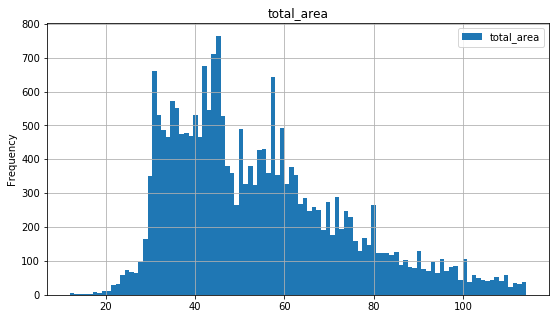

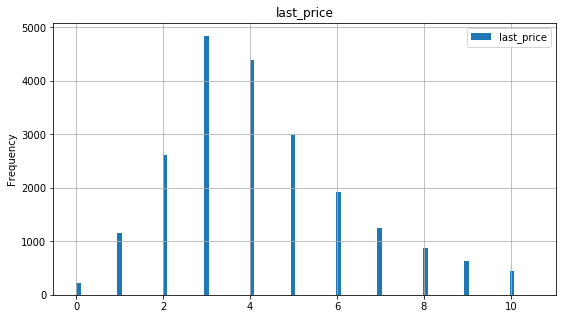

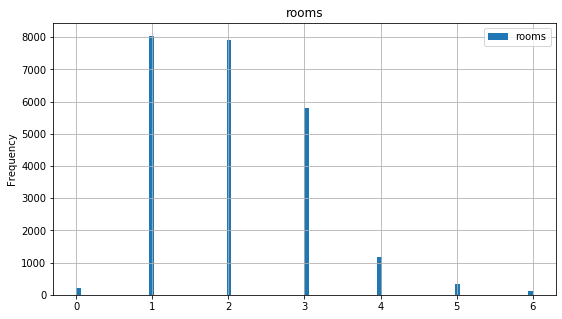

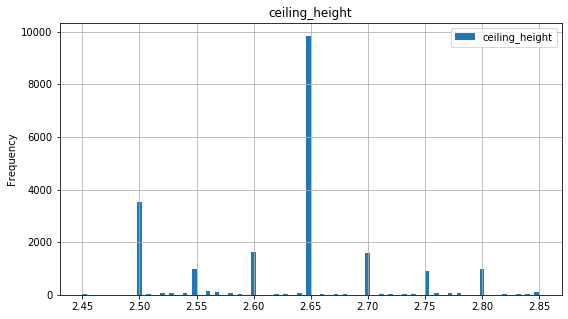

In [31]:
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']

for col in columns:
    rr = det_whiskers(data, col)
    data.plot(y=col, kind='hist', bins=100, grid=True, figsize=(9,5), range=(rr[0], rr[1]), title=col)

In [32]:
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [33]:
data['last_price'].describe()

count    23650.000000
mean         6.052643
std         10.923801
min          0.000000
25%          3.000000
50%          4.000000
75%          6.000000
max        763.000000
Name: last_price, dtype: float64

In [34]:
data['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [35]:
data['ceiling_height'].describe()

count    23650.000000
mean         2.724311
std          0.989255
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

**Промежуточные выводы:**
1. Диапазон площади от 12 до 900 квадратных метров, медиана 52 м2.Распределение нормальное.
2. Медианное значение стоимости (4,65 млн) значительно отличается от среднего (6,54 млн). 
3. Большая часть квартир из базы имеет от 1 до 3 комнат.
4. Среднее (2,77 м) и медианное (2,65 м.) значения высоты потолков различаются не критично.
5. В данных есть неадекватные значения, не все из которых мы можем корректно заменить, вопросы по ним желательно задать отвентственным по данному вопросу коллегам.

"Средняя квартира" - две комнаты, площадью 52 кв м, потолки 2,65 м, продается 95 дней по цене 4,65 млн руб.

**2. Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. Попробуем ответить, когда можно считать, что продажи прошли очень быстро, а когда необычно долго.**

Есть нюанс с нулевыми значениями: часть из них могла быть продана день в день, с другой стороны снятие объявления с продажи может быть результатом ошибочной публикации, смены планов продавца, может это снятие публикаций фейковых страниц силами модераторов и т.д. 

In [36]:
data[data['days_exposition']!=0]['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

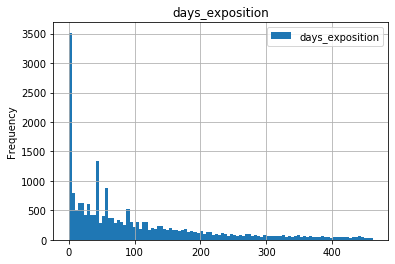

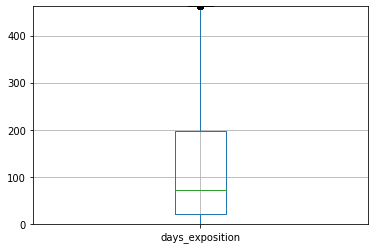

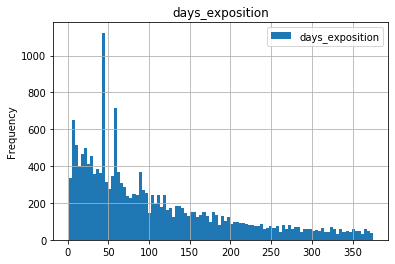

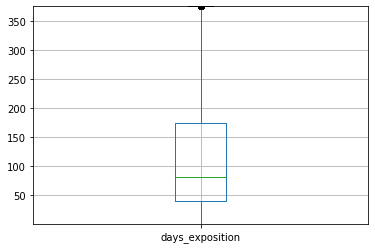

In [45]:
df_lst = [data, days_exposition_data]

for df in df_lst:
    rr = det_whiskers(df, 'days_exposition')
    df.plot(y='days_exposition', kind='hist', bins=100, grid=True, range=(rr[0], rr[1]), title='days_exposition')
    plt.show()
    
    plt.ylim(rr[0], rr[1])
    df.boxplot(column='days_exposition')
    plt.show()


**Вывод:** изучив гистограмму и данные метода describe(), можем сказать, что медиана составляет 95, а среднее значение - 180 дней. У нас есть нетсандартные отклонения в точках 7, 30, 45, 60, 90 дней. Оказалось, что это регламентные <a href='https://yandex.ru/support/realty/owner/home/add-ads-housing.html#concept_ohg_pft_flb'>сроки публикации</a> объявлений для данного сервиса. Судя по диаграмме разамаха и описанию данных, среднее время продажи около 95 дней, самая долгая продажа в прежделах 1,5 квартильного размаха - примерно 460 дней. 

In [39]:
data[data['days_exposition']==45]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_square_meter,weekday_publication,month_publication,year_publication,floor_level,living_to_general_area,kitchen_to_general_area
78,9,4,37.0,2018-02-22,1,2.65,19.0,18.0,6,False,...,0.0,NaN,45,0,3,2,2018,другой,0.486486,0.289189
89,9,2,63.0,2018-10-25,3,2.50,5.0,43.0,4,False,...,NaN,NaN,45,0,3,10,2018,другой,0.682540,0.142857
110,6,3,72.3,2017-09-29,2,2.65,3.0,27.4,2,False,...,NaN,NaN,45,0,4,9,2017,другой,0.378976,0.326418
153,12,4,55.0,2017-05-21,2,2.57,9.0,31.2,2,False,...,0.0,NaN,45,0,6,5,2017,другой,0.567273,0.150909
158,15,3,47.3,2017-11-07,2,2.65,5.0,27.5,2,False,...,NaN,NaN,45,0,1,11,2017,другой,0.581395,0.179704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23601,10,2,43.4,2018-01-11,2,2.65,5.0,inf,1,False,...,2.0,397.0,45,0,3,1,2018,первый,inf,0.209677
23613,4,3,52.0,2018-03-04,3,2.65,5.0,inf,2,False,...,0.0,NaN,45,0,6,3,2018,другой,inf,0.175000
23670,9,2,45.6,2018-02-08,1,2.80,9.0,inf,2,False,...,NaN,NaN,45,0,3,2,2018,другой,inf,0.199561
23679,0,2,35.0,2017-12-08,1,2.65,9.0,inf,4,False,...,NaN,NaN,45,0,4,12,2017,другой,inf,0.260000


**Вывод:** среди этих значений нет ярко выраженных аномалий. Значит наша теория о сроках публикации вероятнее всего верна, можно дополнительно уточнить этот вопрос у коллег, предоставивших данные. 

Срежем выбросы, находящиеся за пределами межквартильного интервала.

Вывод: Необоснованно долгие продажи - свыше 460 дней. Также можем сказать, опираясь на метод `decribe()`, что межквартильный размах времени продажи составляет: 45 - 231 день,  среднее значение - 180, медиана - 95 дней. Нормальные значения лежат в пределах 460 дней.

**3. Уберём редкие и выбивающиеся значения. Опишем, какие особенности обнаружили.**

Диаграмма показывает выбросы в области цен выше 10,8 млн. рублей. Такие квартиры скорее редкость и интересны небольшой группе клиентов премиального сегмента. При необходимости их можно было бы разобрать отдельно, но в нашем исследовании они скорее всего не понадобятся, срежем их.

In [ ]:
days_exposition_data.head()

Посмотрим, как буду выглядеть гистограммы и диаграмма размаха после того, как мы срежем аномальные значения 7, 30, 45, 60, 90

In [ ]:

good_data = data.query('days_exposition != 7 and days_exposition != 30 and days_exposition != 45 and days_exposition != 60 and days_exposition != 90 and days_exposition != 0')


plt.boxplot(good_data['days_exposition'])
plt.ylim(1,600)


good_data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,600))
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 56, grid = True, range = (1,600))


good_data['days_exposition'].describe()


**Вывод:** видим, что закономерно произошло смещение среднего значения и медианы в большую сторону, теперь они составляет 195 и 114 дней соответственно. Нормальные значения лежат теперь в пределах 580 дней.

**4. Изучим факторы больше всего влияющие на стоимость квартиры. Точнее: цена от площади, числа комнат, удалённости от центра, зависимость цены от этаже: первый, последний, другой. Зависимость от даты размещения: дня недели, месяца и года.**

In [ ]:
days_exposition_data=days_exposition_data.query('last_price<10.8')

In [ ]:
(days_exposition_data
    .sort_values(by='last_price',ascending=True)
    .plot(x='last_price',y='total_area',grid=True, style='o',figsize=(30,9))
)

In [ ]:
days_exposition_data['last_price'].corr(days_exposition_data['total_area'])

Коэффициент корреляции составляет 0.68, корреляция положительная, зависимость ощутимая. 

In [ ]:
(days_exposition_data
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms', y='last_price', style='x-', grid=True, figsize=(12,9))
)

In [ ]:
days_exposition_data['last_price'].corr(days_exposition_data["rooms"])

Корреляция цены от количества комнат также прямая и положительная, 0.44, при этом зависимость справедлива до пикового значения в шесть комнат. Если их больше, то удельная цена за квадрат падает.

In [ ]:
(days_exposition_data
    .groupby('floor_level')['last_price'].median()
    .plot(x='floor_level',y='last_price',kind='bar')
)

In [ ]:
days_exposition_data['floor'].corr(days_exposition_data['last_price'])

Квартиры на первом и последнем этажах дешевле остальных. Корреляция очень слабая - 0.14.

In [ ]:
(days_exposition_data
     .groupby('weekday_publication')['last_price'].count()
     .plot(x='weekday_publication',y='last_price',kind='bar')
)

Чаще всего продажи совершаются во вторник, четверг и пятницу.

In [ ]:
(days_exposition_data
     .groupby('month_publication')['last_price'].count()
     .plot(x='month_publication',y='last_price',kind='bar')
)

Видны ощутимые снижения сделок в месяцы январь, май, декабрь, судя по всему связано с большим количеством праздников, также меньше сделок летом, так как многие люди в это время в отпуске.

In [ ]:
(days_exposition_data
     .groupby('year_publication')['last_price'].count()
     .plot(x='year_publication',y='last_price',kind='bar')
)

Пик продаж - 17, 18 год.

**5. Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.**

In [ ]:
price_and_location=days_exposition_data.pivot_table(index='locality_name',values='price_for_square_meter',aggfunc=('count','median'))
price_and_location.sort_values(by='count',ascending=False).head(10)

Дороже всего стоимость в СПб, Кудрово, Парголово, дешевле всего - в Выборге и Всеволожске.

**6. Изучим  квартиры в Санкт-Петербурге. Выясним, какая область входит в центр. Создадим столбец с расстоянием до центра в км. После этого посчитаем среднюю цену для каждого километра. Построим график зависимости от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.**

In [ ]:
days_exposition_data['cityCenters_nearest_km']=days_exposition_data['cityCenters_nearest']/1000

In [ ]:
days_exposition_data['coast_per_km'] = days_exposition_data['last_price']/days_exposition_data['cityCenters_nearest_km']
spb_reg = days_exposition_data.query('locality_name == "Санкт-Петербург"')
spb_reg.head()

In [ ]:
(spb_reg
     .sort_values(by='cityCenters_nearest_km',ascending=True)
     .plot(x='cityCenters_nearest_km',y='coast_per_km', style='-',figsize=(13,4))
)

Примерно с пятого  км больших изменений нет, примем это значение за искомую границу.

**7. Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделаем выводы.**

In [ ]:
spb_center=spb_reg.query('cityCenters_nearest_km<5')
spb_center['last_price'].hist(bins=30)

Средняя цена в этом районе составляет 7-8 млн. руб.

In [ ]:
spb_center['total_area'].hist(bins=30)

Наибольшее количество квартир с площадью 60-70 кв. м.

In [ ]:
spb_center['rooms'].hist(bins=30)

Больше всего двухкомнатных квартир.

In [ ]:
spb_center['ceiling_height'].hist(bins=30,range=(2.5,4.5))

Стандартная высота 2.6 м.

In [ ]:
(spb_center
     .sort_values(by='last_price',ascending=True)
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms',y='last_price',style='x-',grid=True,figsize=(14,6),legend=True)
)


(days_exposition_data
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms',y='last_price',style='x-',grid=True,figsize=(14,6),legend=True)
)
plt.show()

Квартиры в центре значительно дороже, пиковые значения - 5 комнат для центра, 6 комнат для всей выборки, скорее всего более высокая цена шести комнат на втором графике говорит о том, что это количество комнат в жилом доме, а не квартире, либо это могут быть дорогие загородние ЖК. При необходимости можно будет в будущем копнуть глубже.

In [ ]:
(spb_center
    .groupby('floor_level')['last_price'].median()
    .plot(x='floor_level',y='last_price',style='x-',legend=True)
)


(days_exposition_data
    .groupby('floor_level')['last_price'].median()
    .plot(x='floor_level',y='last_price',style='x-',legend=True)
)

plt.show()

Графики повторяют друг друга, первый этаж наименее популярен, квартиры в центре дороже.

In [ ]:
(spb_center
     .sort_values(by='cityCenters_nearest',ascending=True)
     .plot(x='cityCenters_nearest',y='last_price',style='o',alpha=0.2)
)

(days_exposition_data
     .sort_values(by='cityCenters_nearest',ascending=True)
     .plot(x='cityCenters_nearest',y='last_price',style='o',alpha=0.2)
)
plt.show()

Большая часть квартир на первом графике расположена на расстоянии 3,5-5 км, их средняя стоимость 5-9 млн, разброс большой. На втором графике высокая кучномть, видно гораздо большее предложение, большая часть квартир расположена в пределах 35 км. 

In [ ]:
(spb_center
     .groupby('weekday_publication')['last_price'].count()
     .plot(x='weekday_publication',y='last_price',style='x',legend=True)
)

(days_exposition_data
     .groupby('weekday_publication')['last_price'].count()
     .plot(x='weekday_publication',y='last_price',style='x',legend=True)
)

plt.show()

В Выходные продажи падают, из-за более высокой выборки на одном графике это выражено ярче.

In [ ]:
(spb_center
     .groupby('month_publication')['last_price'].count()
     .plot(x='month_publication',y='last_price',style='x-',legend=True)
)
(days_exposition_data
     .groupby('month_publication')['last_price'].count()
     .plot(x='month_publication',y='last_price',style='x-',legend=True)
)

plt.show()

Квартиры в центре значительно меньше подвержены волатильности в течение года. Разница практически не чувситвуется.

In [ ]:
(spb_center
     .groupby('year_publication')['last_price'].count()
     .plot(x='year_publication',y='last_price',style='x-',legend=True)
)
(days_exposition_data
     .groupby('year_publication')['last_price'].count()
     .plot(x='year_publication',y='last_price',style='x-',legend=True)
)

plt.show()

Во время резкого скачка 17 и 18 года, квартиры в центре не подверглись такому резкому повышению спроса. 

## Общий вывод

Для определения рыночной стоимости объектов недвижимости важны следующие параметры:

- общая площадь квартиры
- расстояние до центра города (центр города огранчен окружностью радиусом 5 км)
- число комнат и этаж квартиры (чем ближе к центру эти факторы усиливают своё значение)
- срок продажи квартиры (слишком быстрая продажа — до 1 месяца, слишком долгая продажа — более 15 месяцев (460 дней)).
- кроме того, необходимо ввести ограничения на ввод данных о высоте потолков, названии населённого пункта. Разобраться с коллегами, с чем связаны большие количества пропусков в остальных столбцах.

Самые ликвидные квартиры продаются в будние дни, имеют 1-3 комнаты, находятся не на первом и не на последнем этаже, высота потолков 2.6, стоимость около 4.6 млн. руб. Цена зависит от района, высоты потолков, количества комнат.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод